In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast 

In [56]:
# Cargar el dataset
#file_path = "../../tmp/resultados_cada_clase/alpha_con_negativos.csv" 
#file_path = "../../tmp/resultados_cada_clase/alpha_clases_interes_con_gradiente.csv" 
#file_path = "../../tmp/resultados_cada_clase/alpha_10_mejores_2.csv" 
#file_path = "../../tmp/resultados_cada_clase/alpha_n_datos_gth_5.csv" 
file_path = "../../tmp/resultados_cada_clase/alpha_n_datos_gth_5_2.csv" 
df_alpha = pd.read_csv(file_path)


In [57]:
# Cargar el dataset
#file_path = "../../tmp/resultados_cada_clase/diff_con_negativos.csv"
#file_path = "../../tmp/resultados_cada_clase/diff_clases_interes_con_gradiente.csv"
#file_path = "../../tmp/resultados_cada_clase/diff_10_mejores_2.csv"
#file_path = "../../tmp/resultados_cada_clase/diff_n_datos_gth_5.csv" 
file_path = "../../tmp/resultados_cada_clase/diff_n_datos_gth_5_2.csv" 
df_diff = pd.read_csv(file_path)


In [51]:
df_diff.columns
df_alpha.columns

Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos'],
      dtype='object')

In [52]:
df_alpha["T Gradiente"][0]

C:\Users\cmora\AppData\Local\Temp\ipykernel_5320\2618449352.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_alpha["T Gradiente"][0]


'0.0, 1.0, 6.0, 30.0, 35.0, 35.1, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0'

In [58]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches, Pt

# Cargar datos
df = df_alpha

# Convertir las columnas de gradiente en listas numéricas
df["T Gradiente"] = df["T Gradiente"].apply(lambda x: list(map(float, x.split(","))))
df["Eluyente1 Gradiente"] = df["Eluyente1 Gradiente"].apply(lambda x: list(map(float, x.split(","))))
df["Eluyente2 Gradiente"] = df["Eluyente2 Gradiente"].apply(lambda x: list(map(float, x.split(","))))

# Carpeta para guardar imágenes temporales
output_folder = "temp_images"
os.makedirs(output_folder, exist_ok=True)

# Crear presentación PowerPoint
ppt = Presentation()

# Función para limpiar nombres de archivos
def limpiar_nombre_archivo(nombre):
    return re.sub(r'[<>:"/\\|?*\'()]', '_', nombre)  # Sustituye caracteres inválidos

# Función para limpiar los datos eliminando ceros después del primer valor no cero
def limpiar_datos(t_vals, e1_vals, e2_vals):
    idx_fin = next((idx for idx, val in enumerate(t_vals) if idx > 0 and val == 0.0), len(t_vals))
    return t_vals[:idx_fin], e1_vals[:idx_fin], e2_vals[:idx_fin]

n = 0
# Generar y guardar las gráficas
for i, row in df.iterrows():
    # Limpiar datos antes de graficar
    t_vals, eluyente1_vals, eluyente2_vals = limpiar_datos(
        row["T Gradiente"], row["Eluyente1 Gradiente"], row["Eluyente2 Gradiente"]
    )

    # Crear la figura
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(t_vals, eluyente1_vals, label=row["Eluyente1"], marker='o', linestyle='-', color="blue")
    ax.plot(t_vals, eluyente2_vals, label=row["Eluyente2"], marker='s', linestyle='--', color="orange")

    ax.set_xlabel("Tiempo (T Gradiente)")
    ax.set_ylabel("Concentración")
    ax.set_title(f"Gradiente {i}")
    ax.legend()
    ax.grid(True)

    # Guardar la imagen
    nombre_seguro = limpiar_nombre_archivo(f"alpha_grafica_{i}_{n}.png")
    n += 1
    img_path = os.path.join(output_folder, nombre_seguro)
    fig.savefig(img_path)
    plt.close(fig)

    # Agregar nueva diapositiva al PowerPoint
    slide = ppt.slides.add_slide(ppt.slide_layouts[5])  # Diseño en blanco

    # Insertar título superior con 'Clase': 'Score'
    titulo = slide.shapes.title
    titulo.text = f"{row['Clase']}: {row['Score']}, n_datos: {row['n_datos']}"

    # Insertar la imagen
    img_left = Inches(1)
    img_top = Inches(1.5)
    slide.shapes.add_picture(img_path, img_left, img_top, width=Inches(6), height=Inches(4))

    # Crear cuadro de texto para 'Configuración Columna'
    left_text = Inches(1)
    top_text = Inches(5.8)
    width_text = Inches(6)
    height_text = Inches(1.5)

    text_box = slide.shapes.add_textbox(left_text, top_text, width_text, height_text)
    text_frame = text_box.text_frame
    text_frame.clear()  # Elimina el texto por defecto

    # Agregar título
    p = text_frame.add_paragraph()
    p.text = "Configuración Columna:"
    p.font.bold = True
    p.font.size = Pt(14)

    # Agregar información de configuración
    configuracion = f"""
    pH1: {row['pH1']}  |  pH2: {row['pH2']}  |  Columna: {row['Columna Nombre']}
    USP Code: {row['USP Code']}  |  Longitud: {row['Longitud']} mm
    Tamaño Partícula: {row['Tamaño de Partícula']} µm  |  Temp: {row['Temperatura']}°C
    Flujo: {row['Flujo']} mL/min  |  T0: {row['T0']} min
    """
    p = text_frame.add_paragraph()
    p.text = configuracion
    p.font.size = Pt(12)

# Guardar la presentación PowerPoint
ppt.save("gradientes_alpha.pptx")

print("Presentación guardada como 'gradientes_alpha.pptx' 📊🎉")


Presentación guardada como 'gradientes_alpha.pptx' 📊🎉


In [59]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches, Pt

# Cargar datos
df = df_diff

# Convertir las columnas de gradiente en listas numéricas
df["T Gradiente"] = df["T Gradiente"].apply(lambda x: list(map(float, x.split(","))))
df["Eluyente1 Gradiente"] = df["Eluyente1 Gradiente"].apply(lambda x: list(map(float, x.split(","))))
df["Eluyente2 Gradiente"] = df["Eluyente2 Gradiente"].apply(lambda x: list(map(float, x.split(","))))

# Carpeta para guardar imágenes temporales
output_folder = "temp_images"
os.makedirs(output_folder, exist_ok=True)

# Crear presentación PowerPoint
ppt = Presentation()

# Función para limpiar nombres de archivos
def limpiar_nombre_archivo(nombre):
    return re.sub(r'[<>:"/\\|?*\'()]', '_', nombre)  # Sustituye caracteres inválidos

# Función para limpiar los datos eliminando ceros después del primer valor no cero
def limpiar_datos(t_vals, e1_vals, e2_vals):
    idx_fin = next((idx for idx, val in enumerate(t_vals) if idx > 0 and val == 0.0), len(t_vals))
    return t_vals[:idx_fin], e1_vals[:idx_fin], e2_vals[:idx_fin]

n = 0
# Generar y guardar las gráficas
for i, row in df.iterrows():
    # Limpiar datos antes de graficar
    t_vals, eluyente1_vals, eluyente2_vals = limpiar_datos(
        row["T Gradiente"], row["Eluyente1 Gradiente"], row["Eluyente2 Gradiente"]
    )

    # Crear la figura
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(t_vals, eluyente1_vals, label=row["Eluyente1"], marker='o', linestyle='-', color="blue")
    ax.plot(t_vals, eluyente2_vals, label=row["Eluyente2"], marker='s', linestyle='--', color="orange")

    ax.set_xlabel("Tiempo (T Gradiente)")
    ax.set_ylabel("Concentración")
    ax.set_title(f"Gradiente {i}")
    ax.legend()
    ax.grid(True)

    # Guardar la imagen
    nombre_seguro = limpiar_nombre_archivo(f"diff_grafica_{i}_{n}.png")
    n += 1
    img_path = os.path.join(output_folder, nombre_seguro)
    fig.savefig(img_path)
    plt.close(fig)

    # Agregar nueva diapositiva al PowerPoint
    slide = ppt.slides.add_slide(ppt.slide_layouts[5])  # Diseño en blanco

    # Insertar título superior con 'Clase': 'Score'
    titulo = slide.shapes.title
    titulo.text = f"{row['Clase']}: {row['Score']}, n_datos: {row['n_datos']}"

    # Insertar la imagen
    img_left = Inches(1)
    img_top = Inches(1.5)
    slide.shapes.add_picture(img_path, img_left, img_top, width=Inches(6), height=Inches(4))

    # Crear cuadro de texto para 'Configuración Columna'
    left_text = Inches(1)
    top_text = Inches(5.8)
    width_text = Inches(6)
    height_text = Inches(1.5)

    text_box = slide.shapes.add_textbox(left_text, top_text, width_text, height_text)
    text_frame = text_box.text_frame
    text_frame.clear()  # Elimina el texto por defecto

    # Agregar título
    p = text_frame.add_paragraph()
    p.text = "Configuración Columna:"
    p.font.bold = True
    p.font.size = Pt(14)

    # Agregar información de configuración
    configuracion = f"""
    pH1: {row['pH1']}  |  pH2: {row['pH2']}  |  Columna: {row['Columna Nombre']}
    USP Code: {row['USP Code']}  |  Longitud: {row['Longitud']} mm
    Tamaño Partícula: {row['Tamaño de Partícula']} µm  |  Temp: {row['Temperatura']}°C
    Flujo: {row['Flujo']} mL/min  |  T0: {row['T0']} min
    """
    p = text_frame.add_paragraph()
    p.text = configuracion
    p.font.size = Pt(12)

# Guardar la presentación PowerPoint
ppt.save("gradientes_diff.pptx")

print("Presentación guardada como 'gradientes_diff.pptx' 📊🎉")


Presentación guardada como 'gradientes_diff.pptx' 📊🎉


In [ ]:
# Crear gráficos para cada fila del DataFrame
for i, row in df_diff.iterrows():
    plt.figure(figsize=(6, 4))
    plt.plot(row["T Gradiente"], row["Eluyente1 Gradiente"], label="Eluyente1", marker='o')
    plt.plot(row["T Gradiente"], row["Eluyente2 Gradiente"], label="Eluyente2", marker='s')
    
    plt.xlabel("Tiempo (T Gradiente)")
    plt.ylabel("Concentración")
    plt.title(f"Gradiente de Eluyentes - Fila {i}")
    plt.legend()
    plt.grid(True)
    
    plt.show()

In [ ]:
# Convertir variables categóricas a tipo 'category'
categorical_cols = ["Clase", "Eluyente1", "Eluyente2", "Columna Nombre", "USP Code"]#"gradiente", "Columna", "USP Code"]
df_alpha[categorical_cols] = df_alpha[categorical_cols].astype("category")
df_diff[categorical_cols] = df_diff[categorical_cols].astype("category")

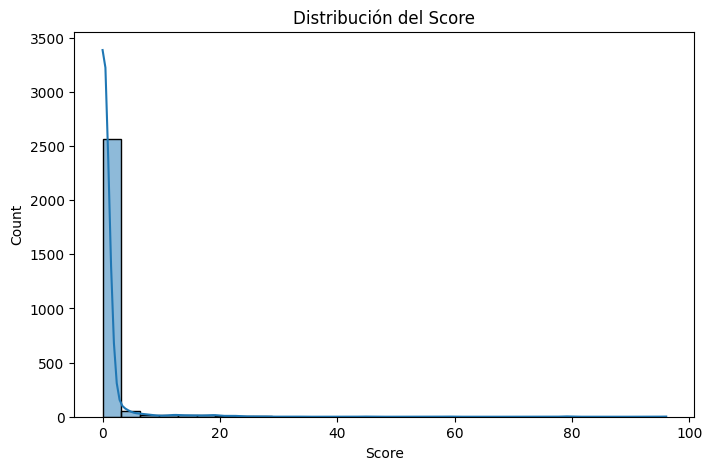

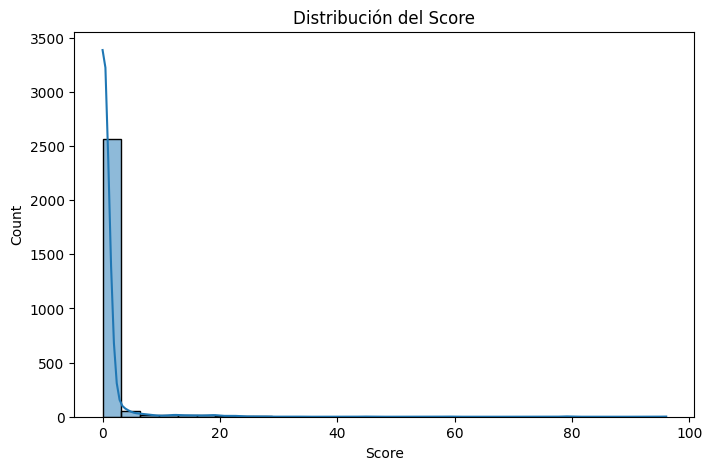

In [14]:
# Distribución general del Score
plt.figure(figsize=(8, 5))
sns.histplot(df_alpha["Score"], bins=30, kde=True)
plt.title("Distribución del Score")
plt.show()

# Distribución general del Score
plt.figure(figsize=(8, 5))
sns.histplot(df_diff["Score"], bins=30, kde=True)
plt.title("Distribución del Score")
plt.show()

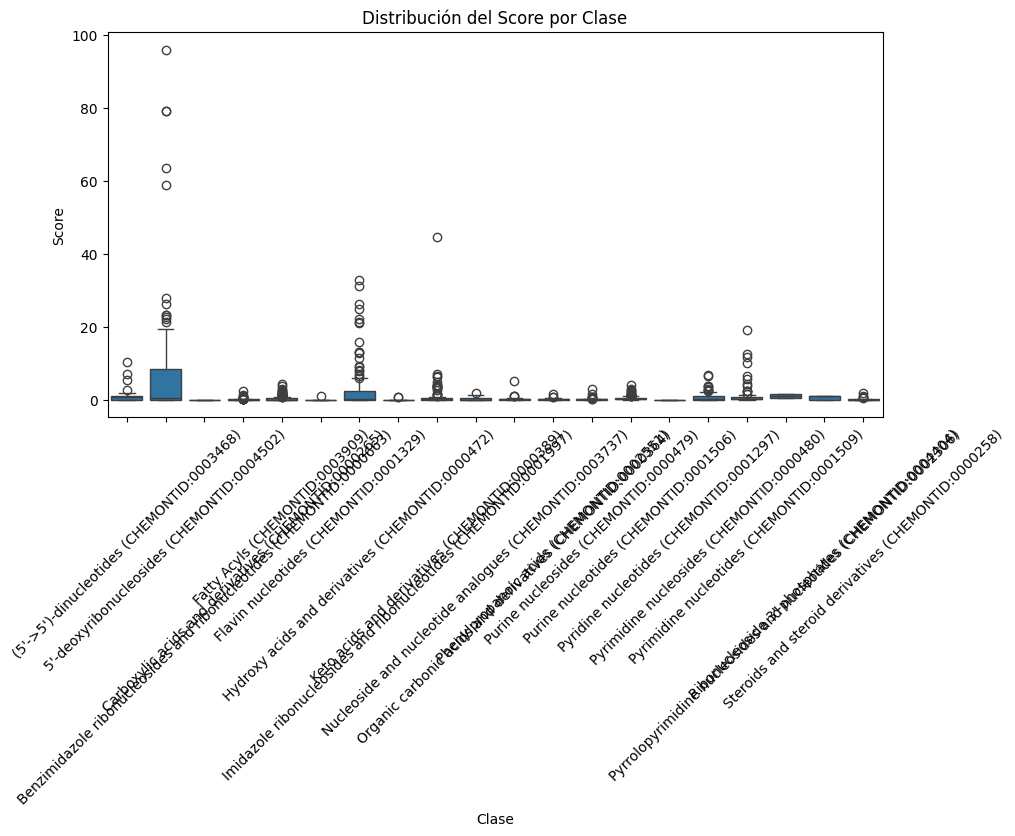

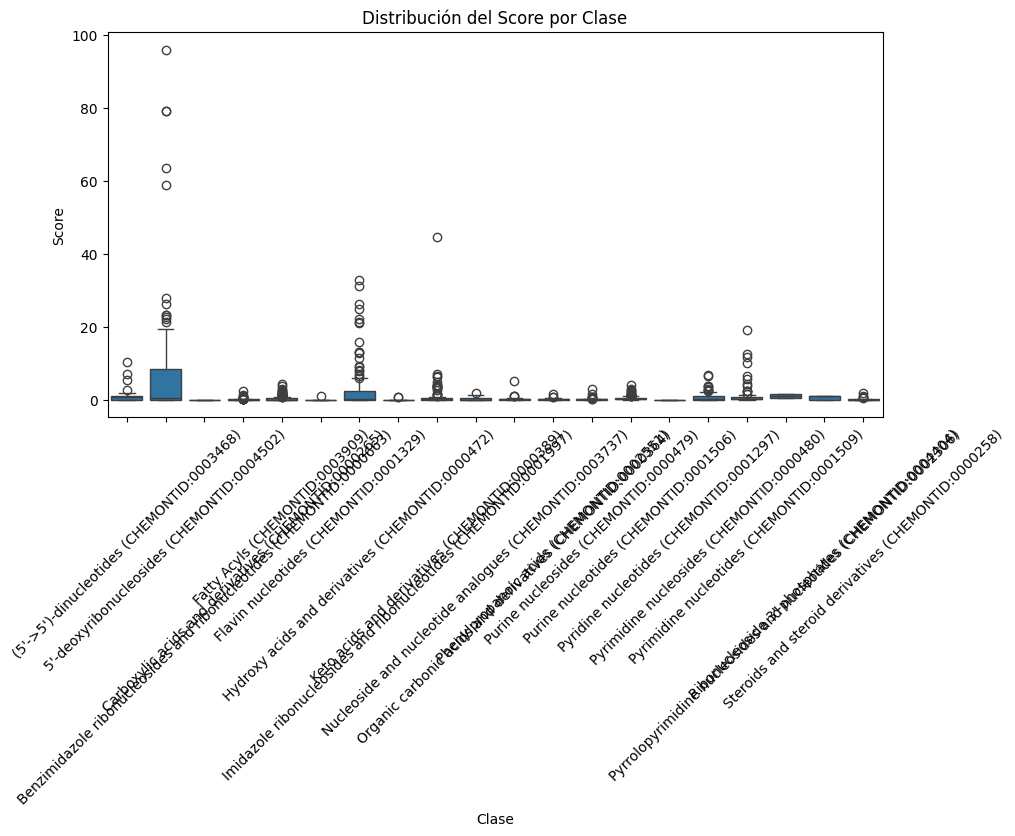

In [15]:

# Distribución del Score según la Clase
plt.figure(figsize=(10, 5))
sns.boxplot(x="Clase", y="Score", data=df_alpha)
plt.xticks(rotation=45)
plt.title("Distribución del Score por Clase")
plt.show()


# Distribución del Score según la Clase
plt.figure(figsize=(10, 5))
sns.boxplot(x="Clase", y="Score", data=df_diff)
plt.xticks(rotation=45)
plt.title("Distribución del Score por Clase")
plt.show()

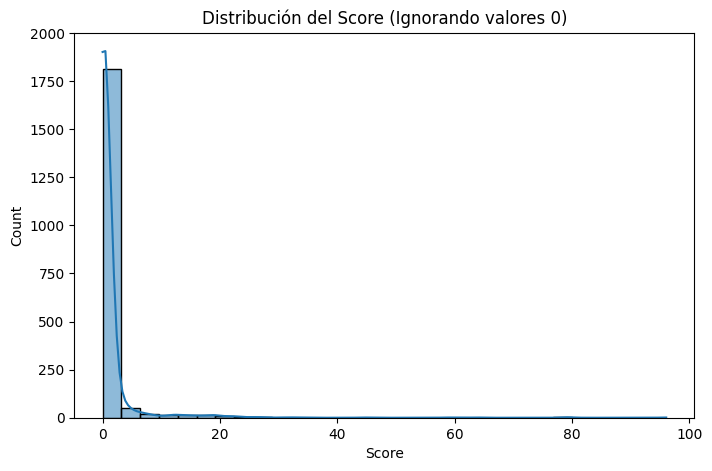

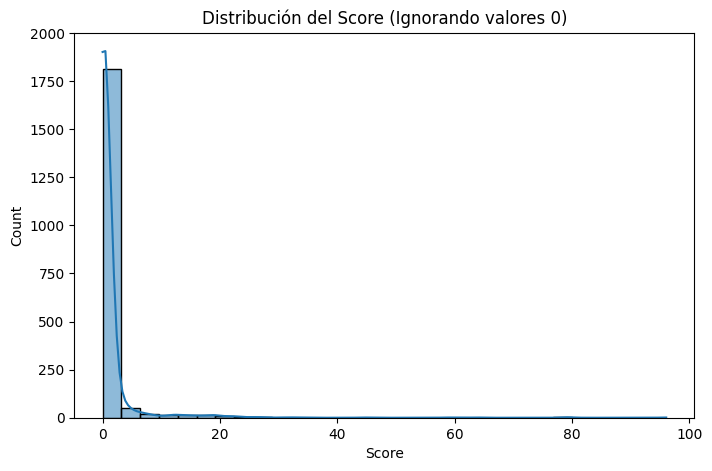

In [16]:
# Distribución del Score sin valores 0
df_nonzero = df_alpha[df_alpha["Score"] > 0]
plt.figure(figsize=(8, 5))
sns.histplot(df_nonzero["Score"], bins=30, kde=True)
plt.title("Distribución del Score (Ignorando valores 0)")
plt.show()

# Distribución del Score sin valores 0
df_nonzero = df_diff[df_diff["Score"] > 0]
plt.figure(figsize=(8, 5))
sns.histplot(df_nonzero["Score"], bins=30, kde=True)
plt.title("Distribución del Score (Ignorando valores 0)")
plt.show()

C:\Users\cmora\AppData\Local\Temp\ipykernel_13096\498376668.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zero_counts = df_alpha[df_alpha["Score"] == 0].groupby("Clase")["Score"].count()


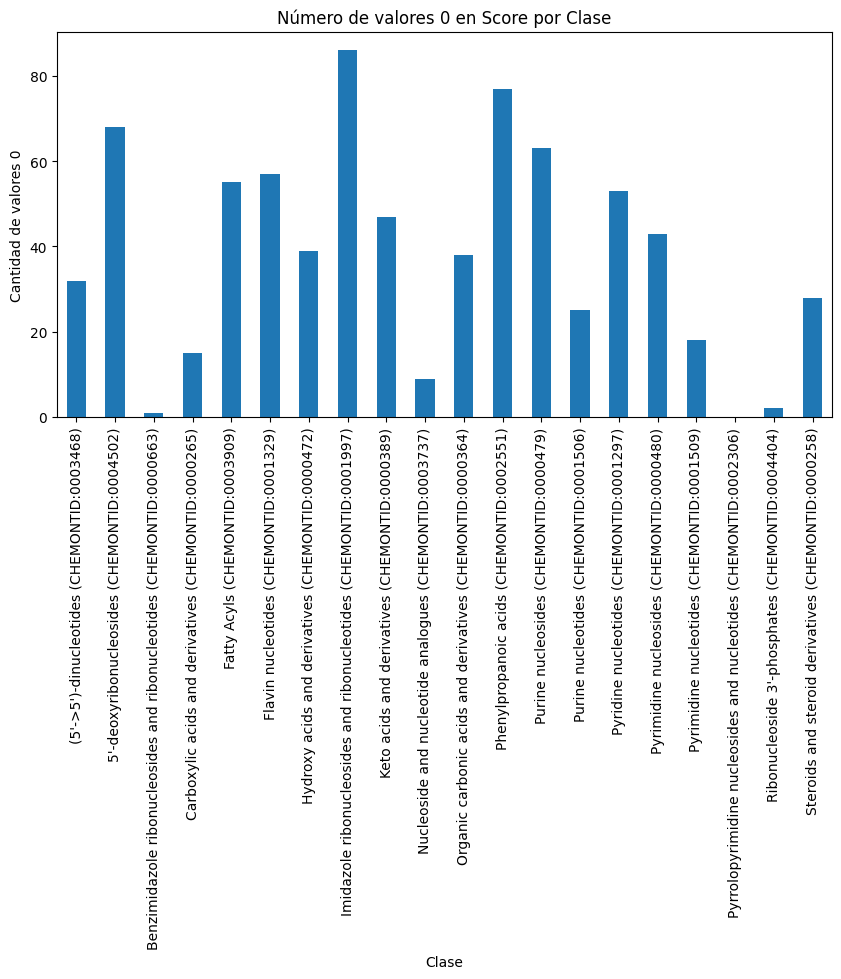

C:\Users\cmora\AppData\Local\Temp\ipykernel_13096\498376668.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zero_counts = df_diff[df_diff["Score"] == 0].groupby("Clase")["Score"].count()


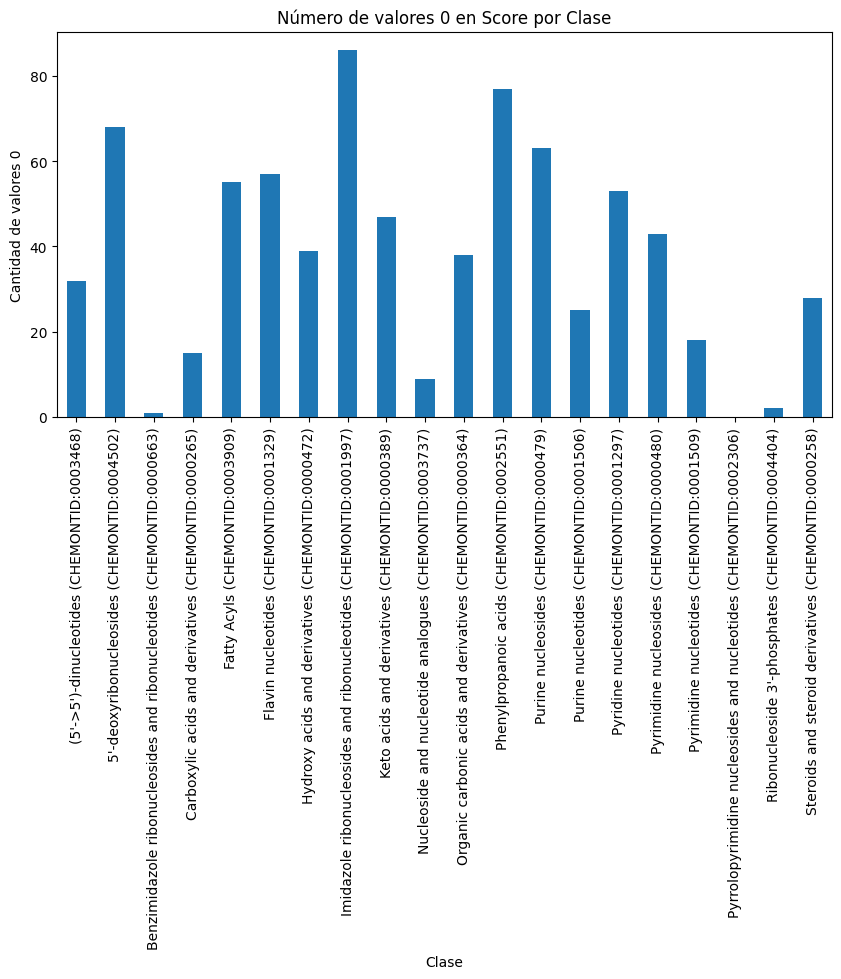

In [17]:
# Número de ceros en Score por Clase
zero_counts = df_alpha[df_alpha["Score"] == 0].groupby("Clase")["Score"].count()
zero_counts.plot(kind="bar", figsize=(10, 5))
plt.title("Número de valores 0 en Score por Clase")
plt.ylabel("Cantidad de valores 0")
plt.show()

# Número de ceros en Score por Clase
zero_counts = df_diff[df_diff["Score"] == 0].groupby("Clase")["Score"].count()
zero_counts.plot(kind="bar", figsize=(10, 5))
plt.title("Número de valores 0 en Score por Clase")
plt.ylabel("Cantidad de valores 0")
plt.show()

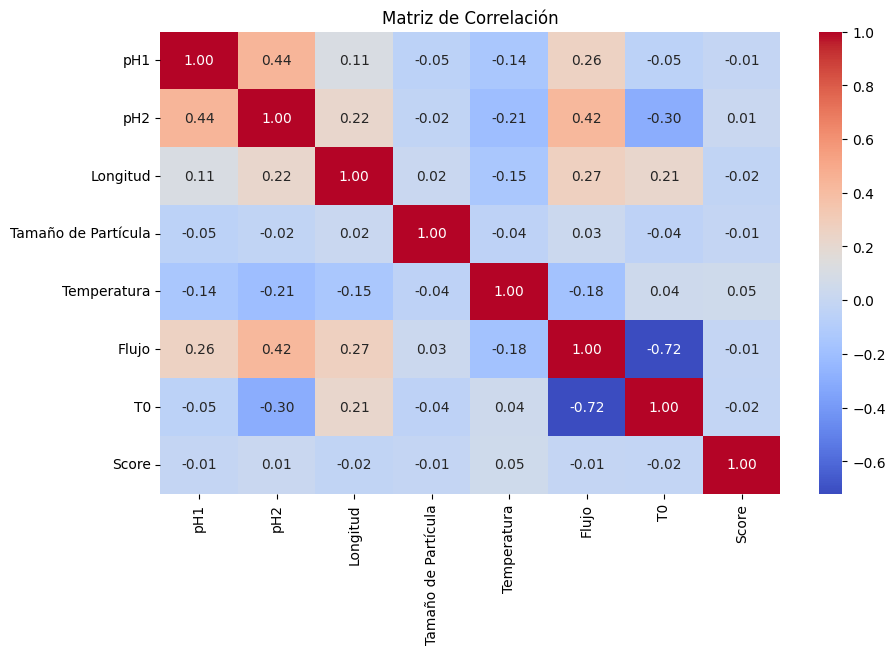

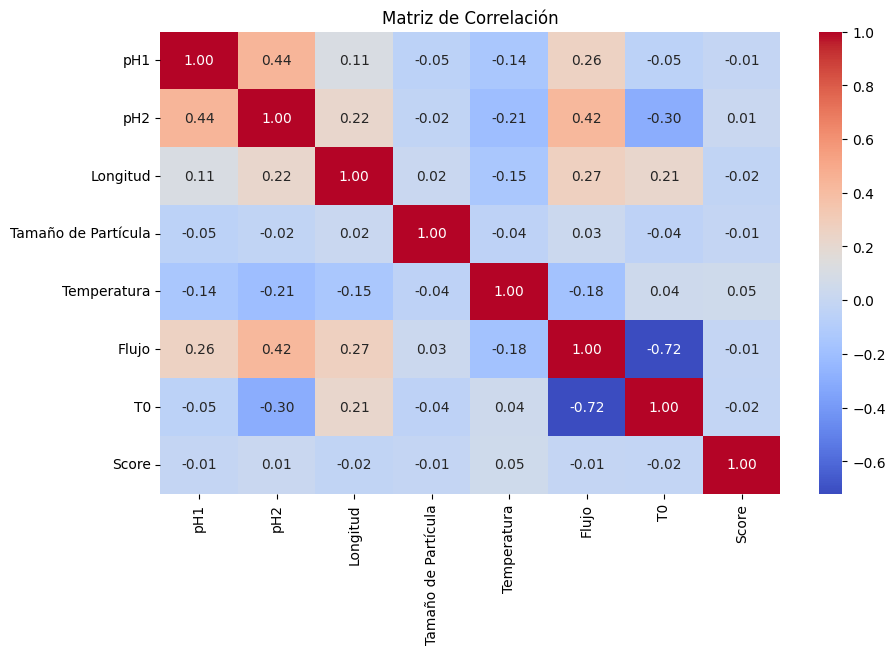

In [18]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_alpha.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_diff.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

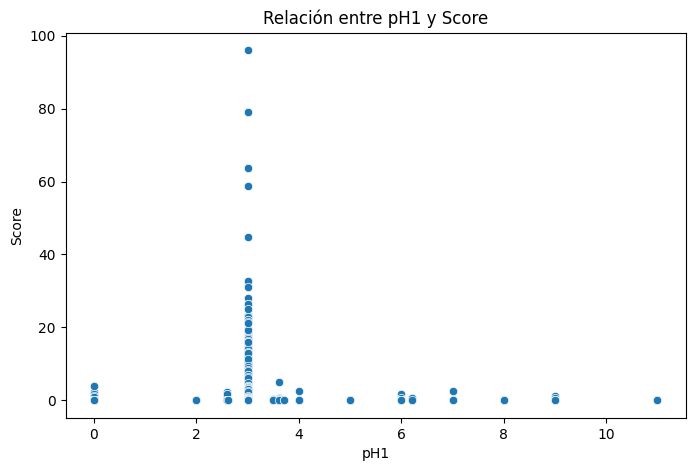

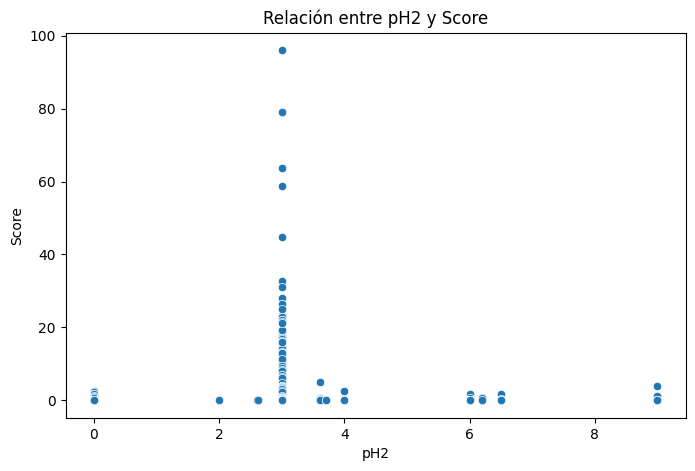

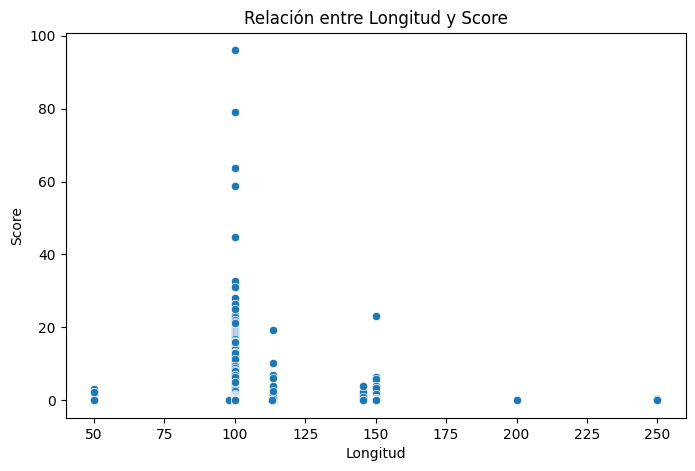

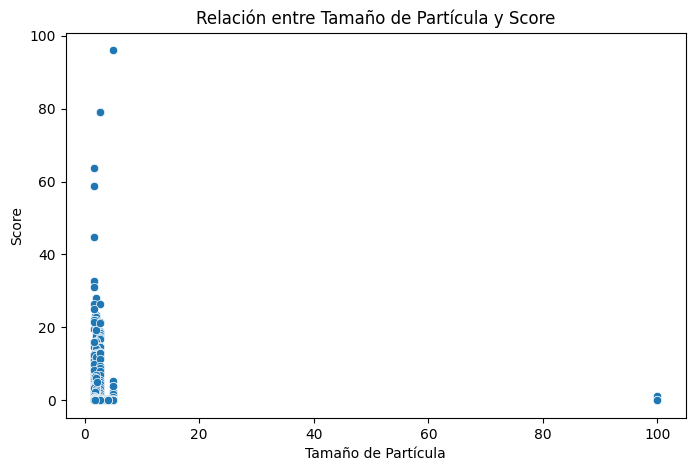

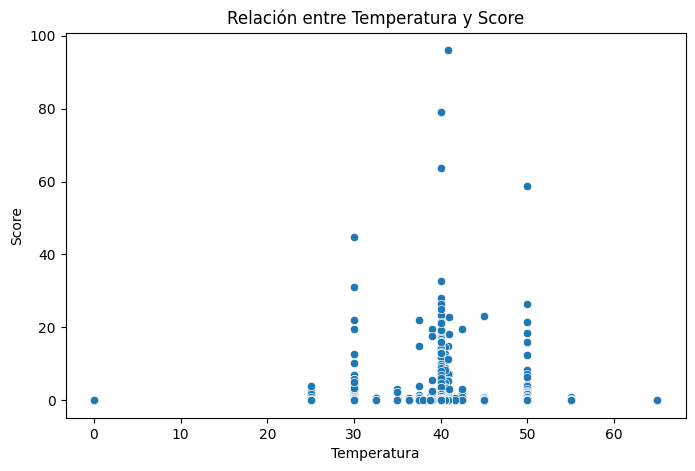

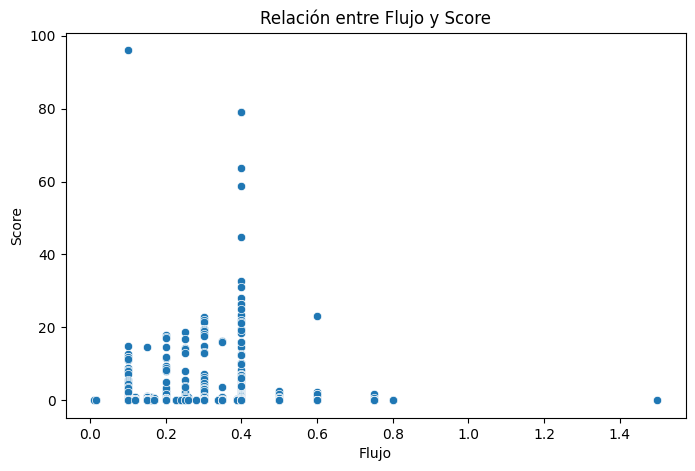

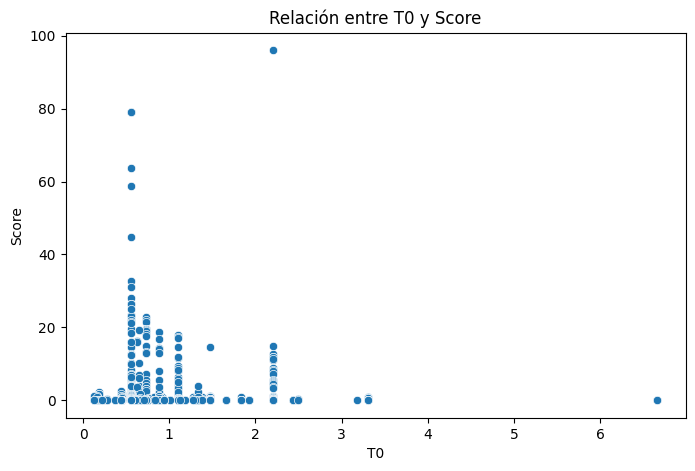

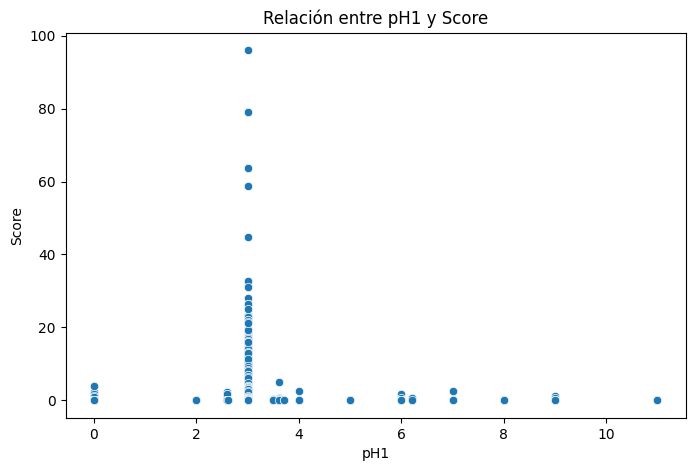

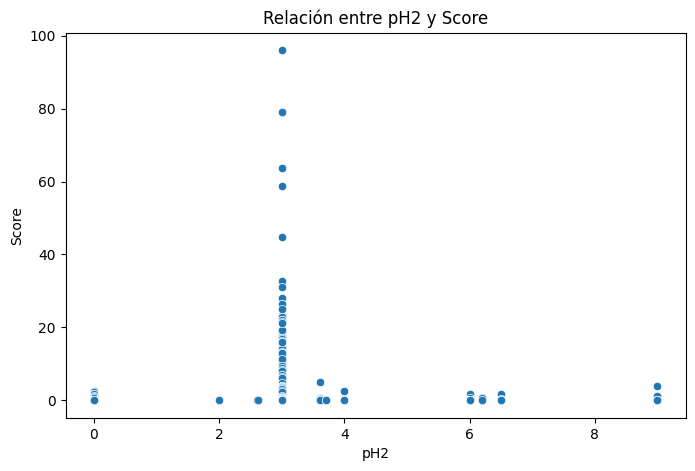

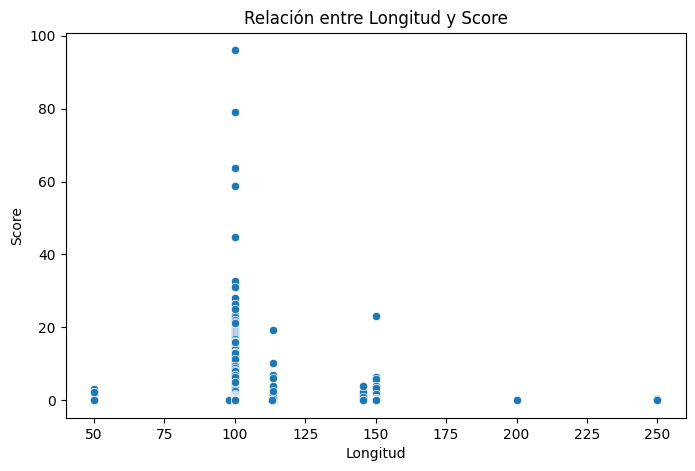

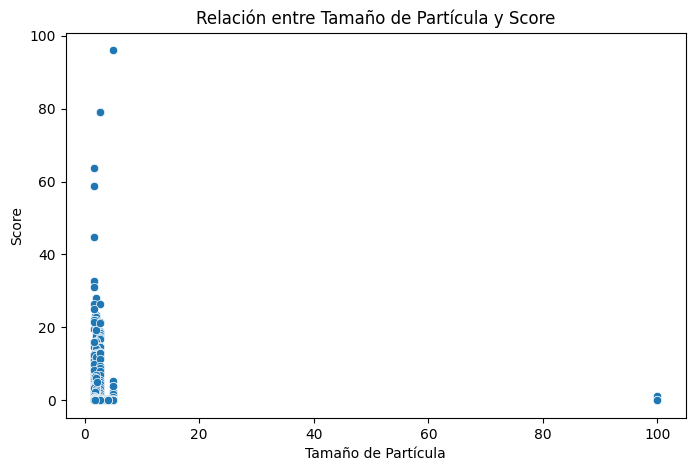

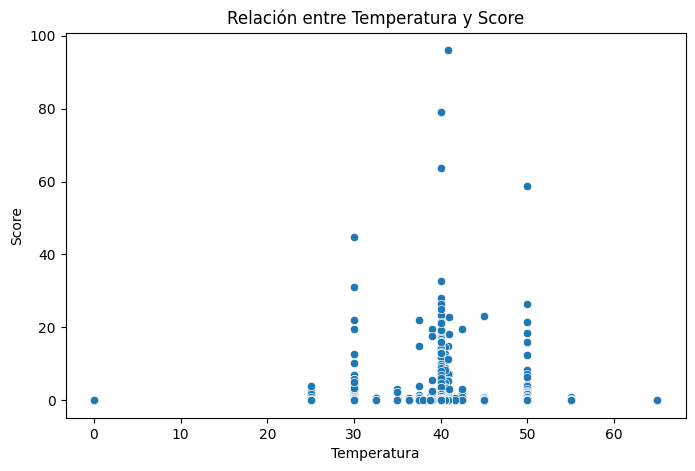

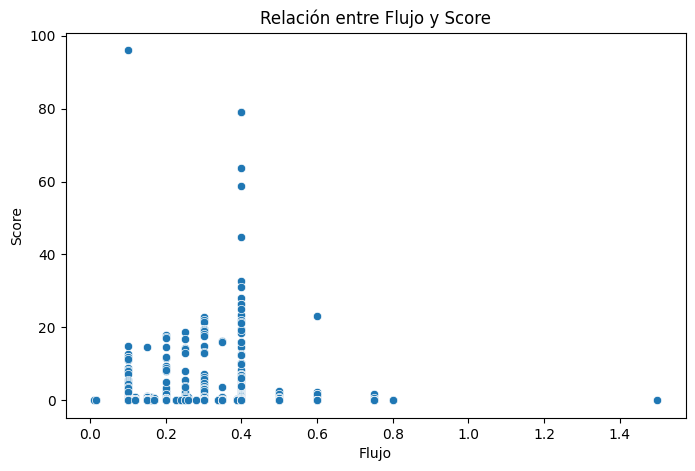

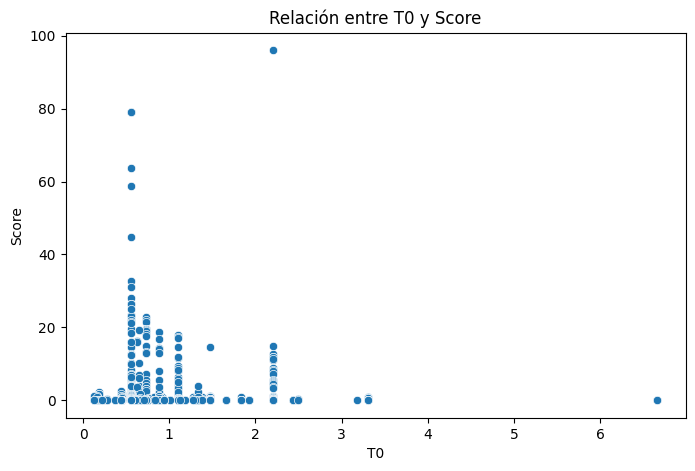

In [21]:
# Relación entre Score y otras variables numéricas
numeric_cols = ["pH1", "pH2", "Longitud", "Tamaño de Partícula", "Temperatura", "Flujo", "T0"]
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_alpha[col], y=df_alpha["Score"])
    plt.title(f"Relación entre {col} y Score")
    plt.show()

# Relación entre Score y otras variables numéricas
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_diff[col], y=df_diff["Score"])
    plt.title(f"Relación entre {col} y Score")
    plt.show()

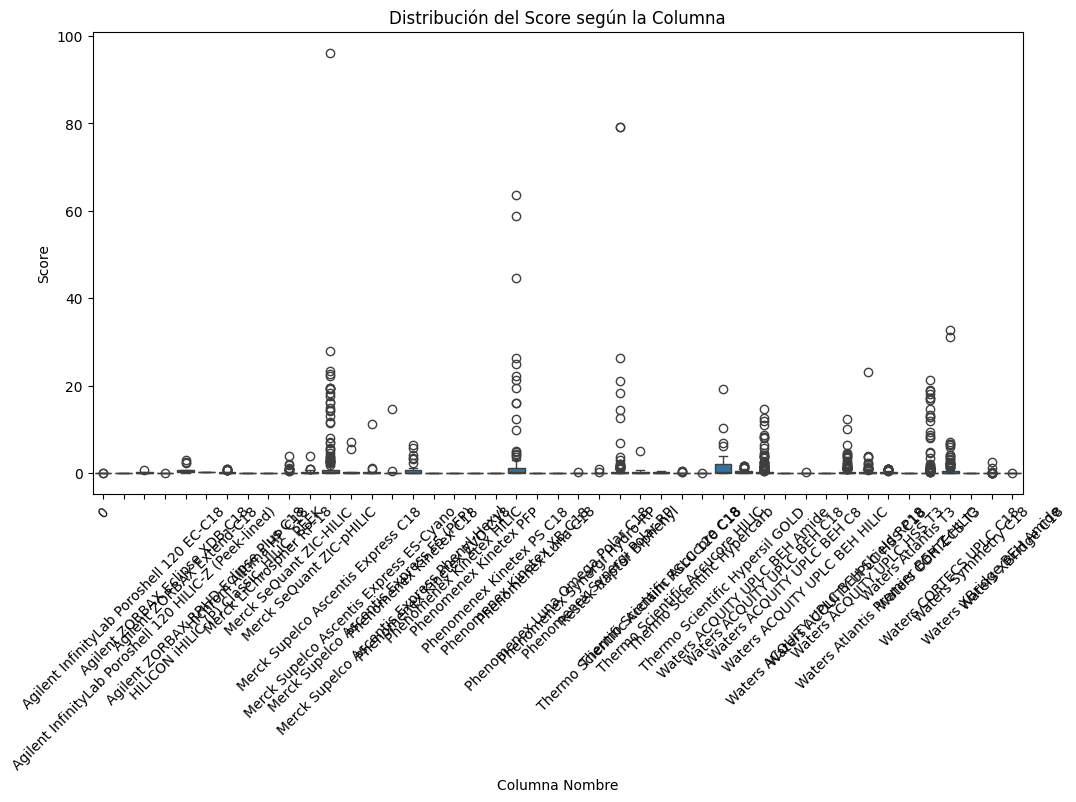

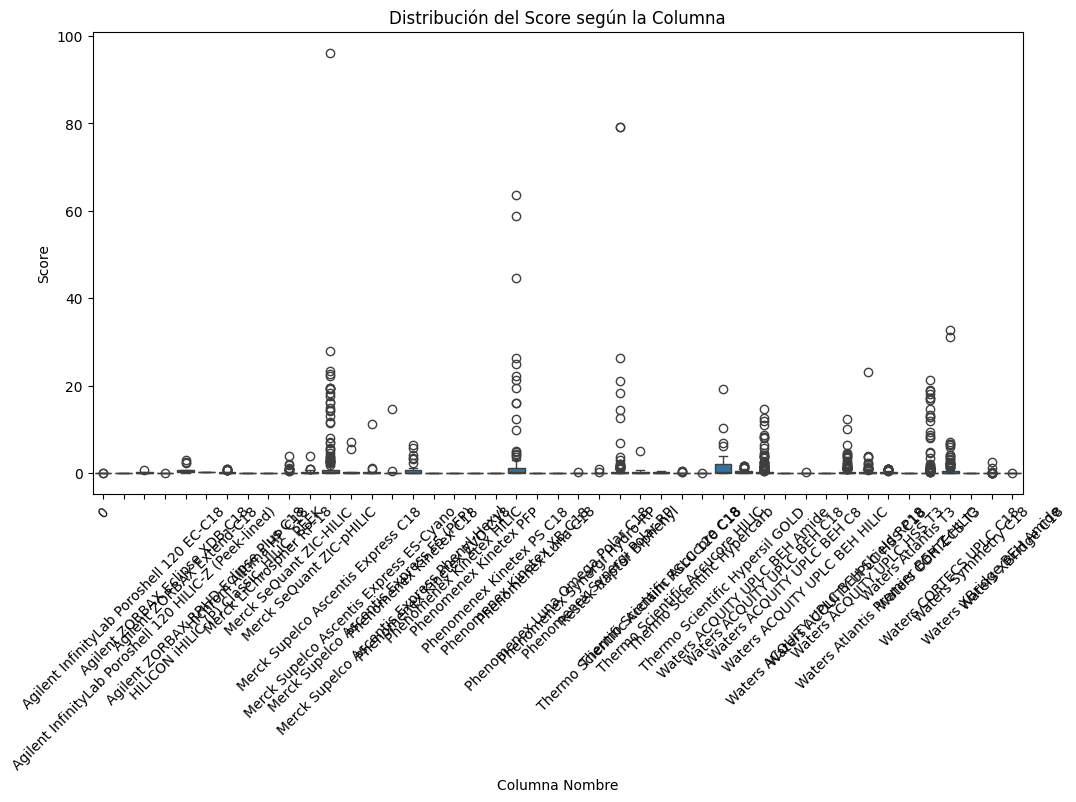

In [23]:
# Boxplot del Score según la columna utilizada
plt.figure(figsize=(12, 6))
sns.boxplot(x="Columna Nombre", y="Score", data=df_alpha)
plt.xticks(rotation=45)
plt.title("Distribución del Score según la Columna")
plt.show()

# Boxplot del Score según la columna utilizada
plt.figure(figsize=(12, 6))
sns.boxplot(x="Columna Nombre", y="Score", data=df_diff)
plt.xticks(rotation=45)
plt.title("Distribución del Score según la Columna")
plt.show()

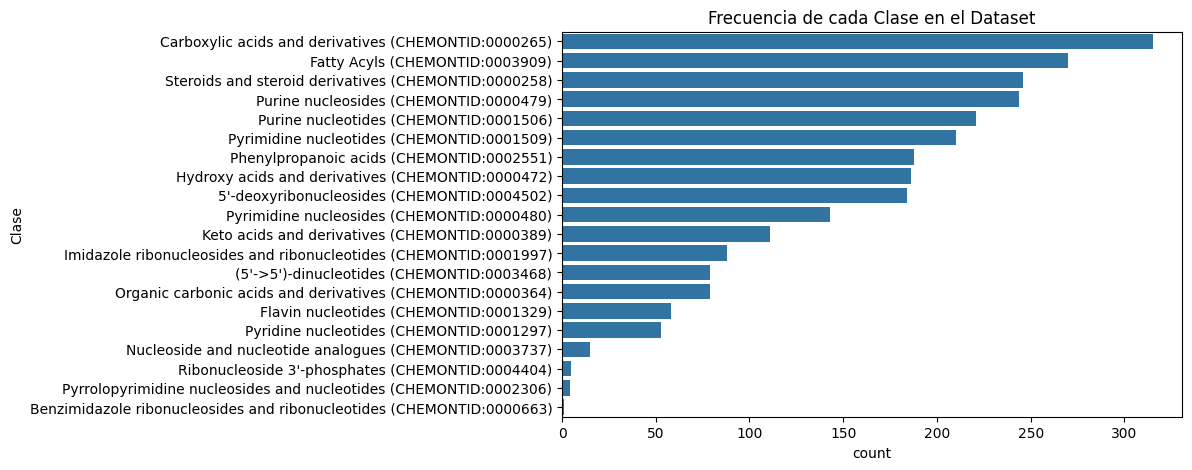

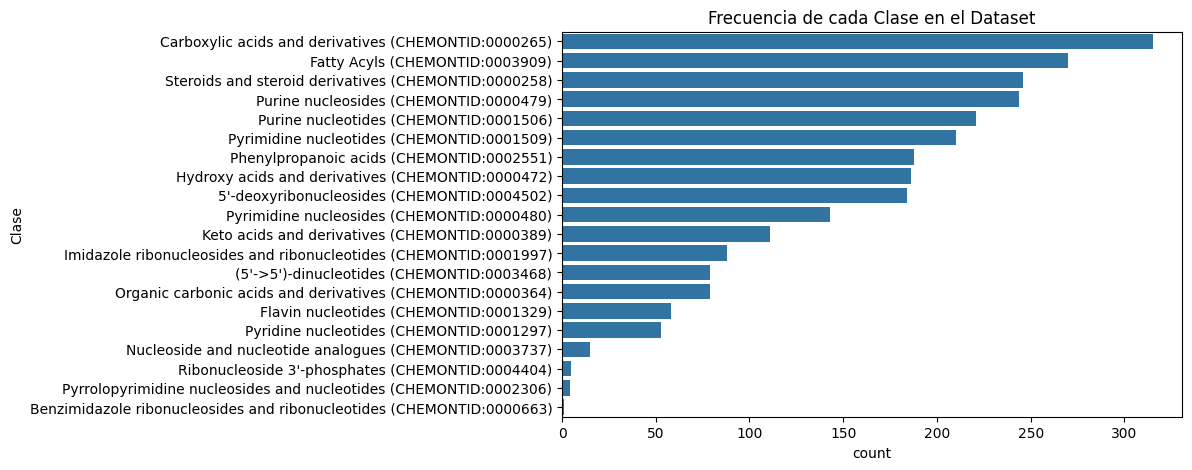

In [24]:
# Conteo de clases en el dataset
plt.figure(figsize=(8, 5))
sns.countplot(y=df_alpha["Clase"], order=df_alpha["Clase"].value_counts().index)
plt.title("Frecuencia de cada Clase en el Dataset")
plt.show()

# Conteo de clases en el dataset
plt.figure(figsize=(8, 5))
sns.countplot(y=df_diff["Clase"], order=df_diff["Clase"].value_counts().index)
plt.title("Frecuencia de cada Clase en el Dataset")
plt.show()


SIN TENER EN CUENTA LOS 0

In [25]:
df_alpha = df_alpha[df_alpha["Score"] > 0]
df_diff = df_diff[df_diff["Score"] > 0]

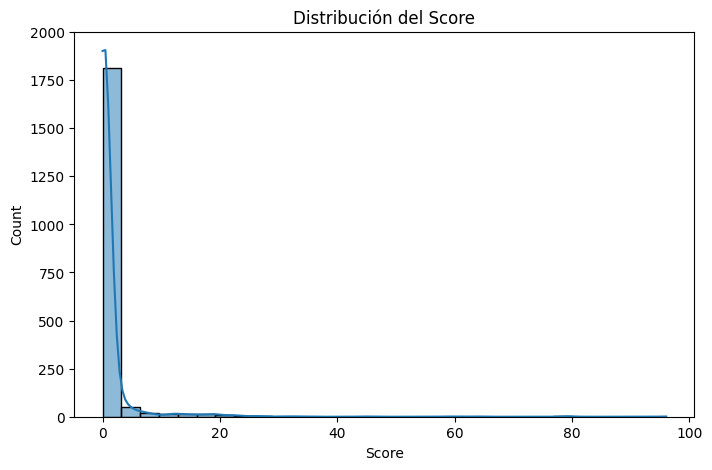

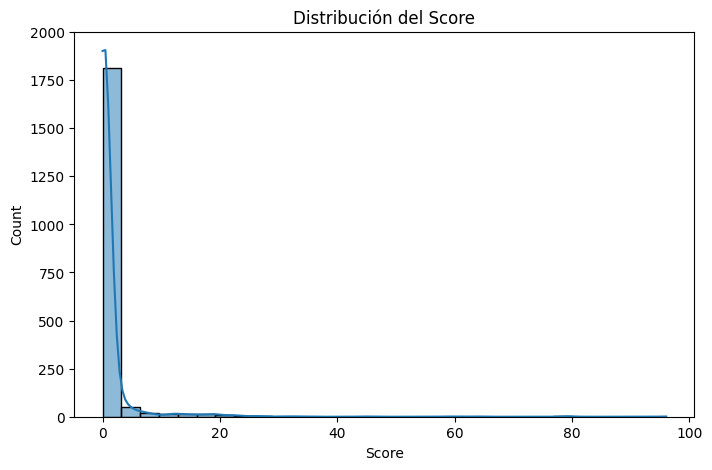

In [26]:

# Distribución general del Score
plt.figure(figsize=(8, 5))
sns.histplot(df_alpha["Score"], bins=30, kde=True)
plt.title("Distribución del Score")
plt.show()


# Distribución general del Score
plt.figure(figsize=(8, 5))
sns.histplot(df_diff["Score"], bins=30, kde=True)
plt.title("Distribución del Score")
plt.show()

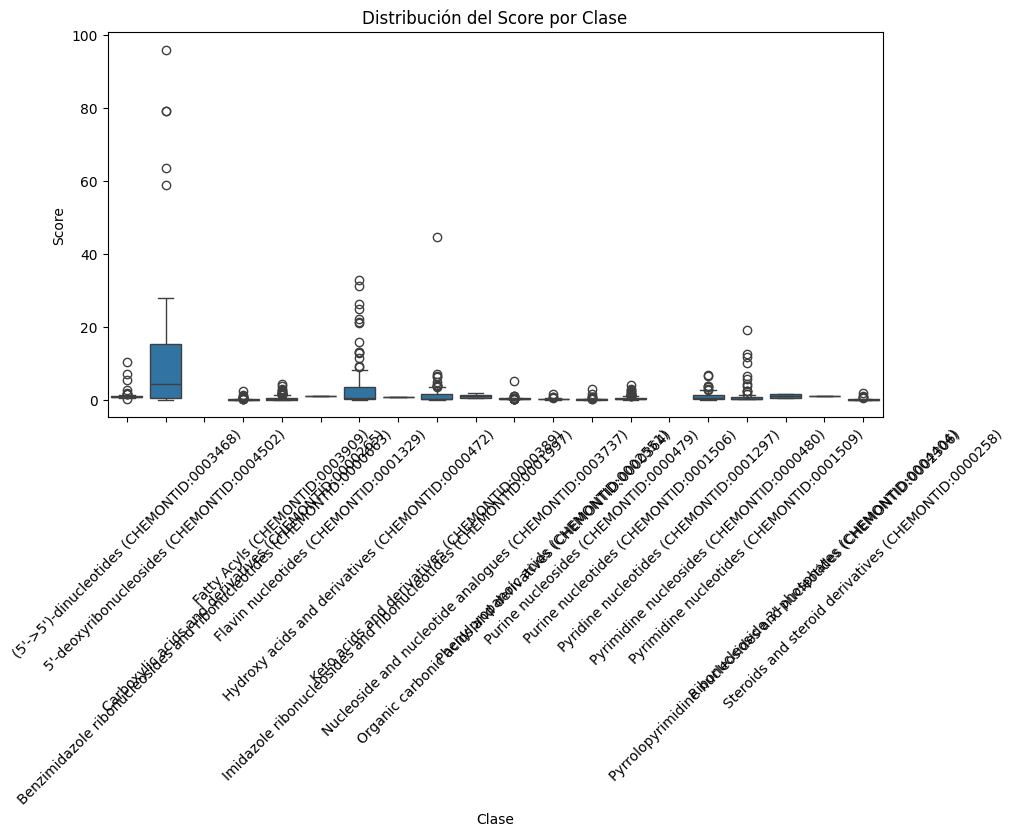

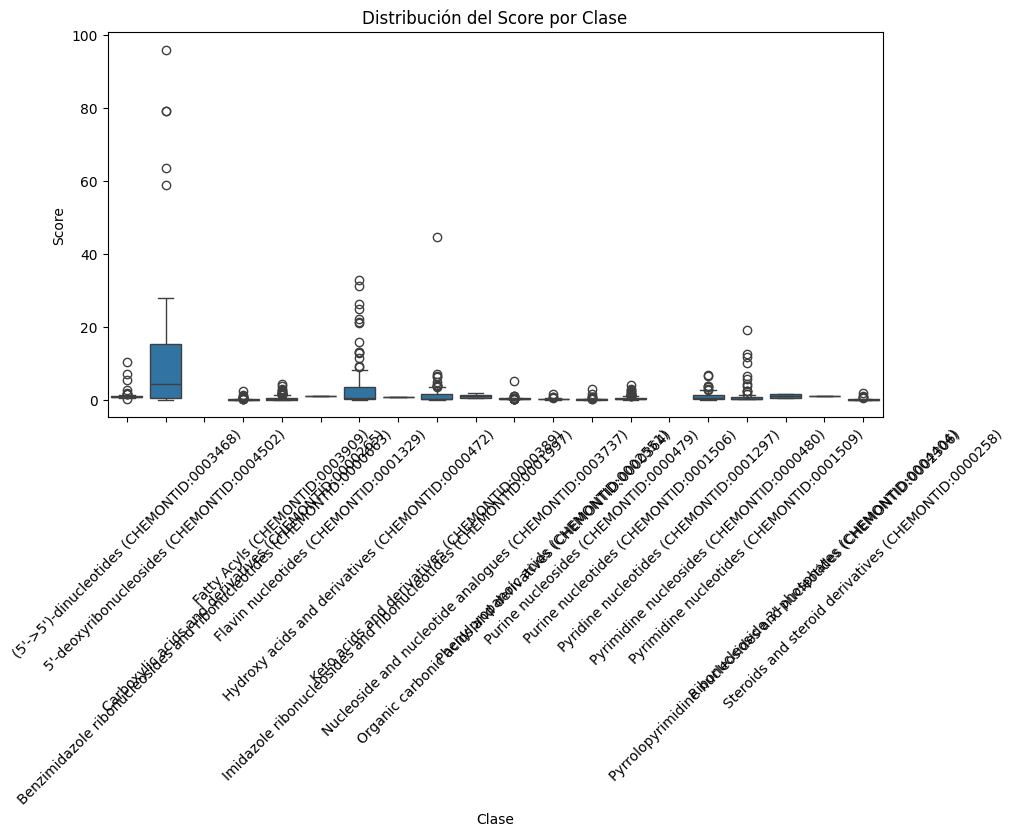

In [27]:
# Distribución del Score según la Clase
plt.figure(figsize=(10, 5))
sns.boxplot(x="Clase", y="Score", data=df_alpha)
plt.xticks(rotation=45)
plt.title("Distribución del Score por Clase")
plt.show()

# Distribución del Score según la Clase
plt.figure(figsize=(10, 5))
sns.boxplot(x="Clase", y="Score", data=df_diff)
plt.xticks(rotation=45)
plt.title("Distribución del Score por Clase")
plt.show()

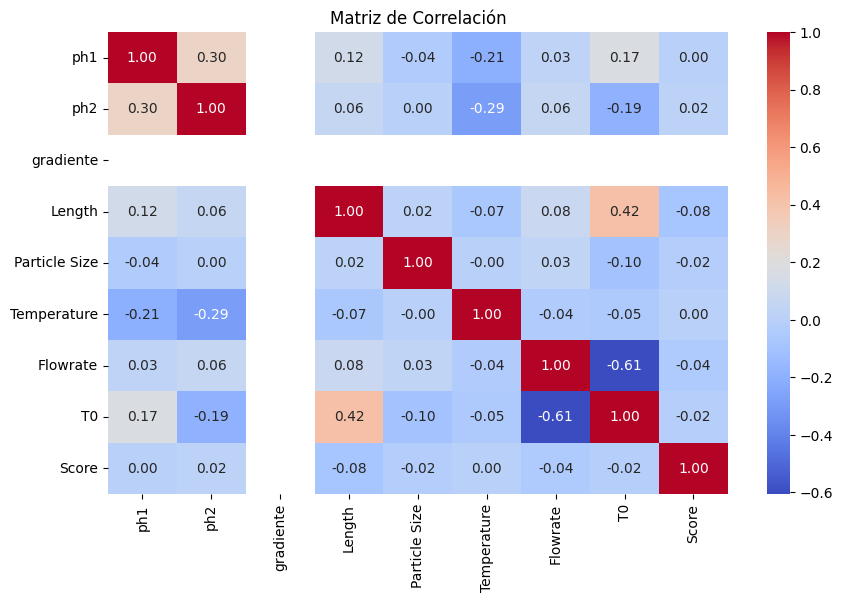

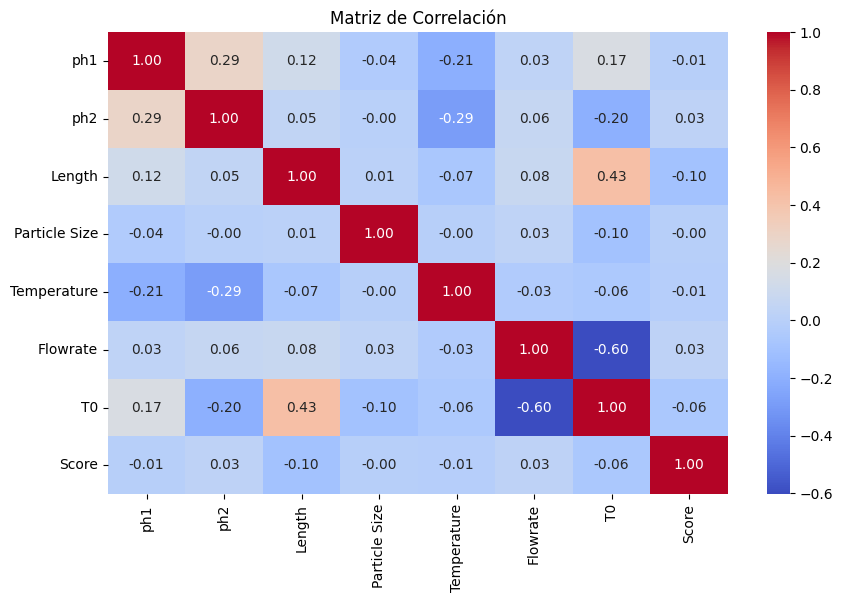

In [18]:
# Número de ceros en Score por Clase (Ya no aplica porque eliminamos los 0)
# Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_alpha.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_diff.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

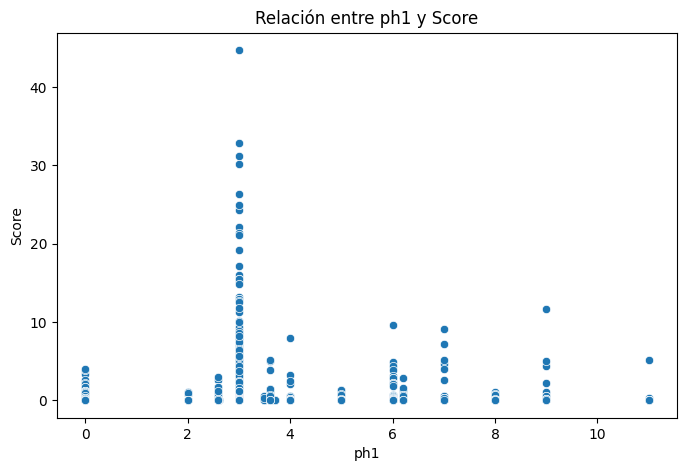

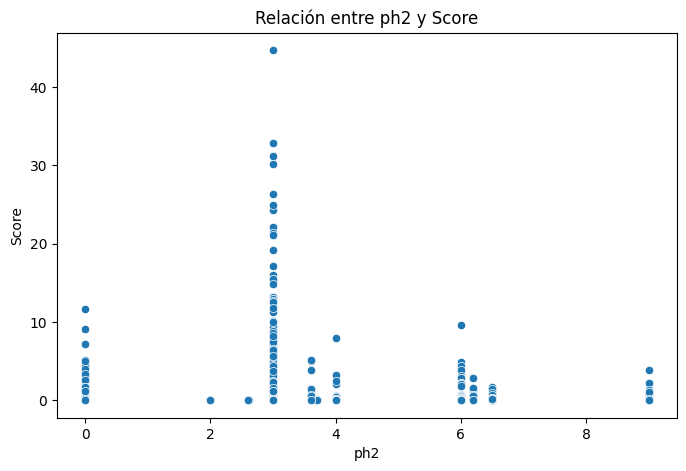

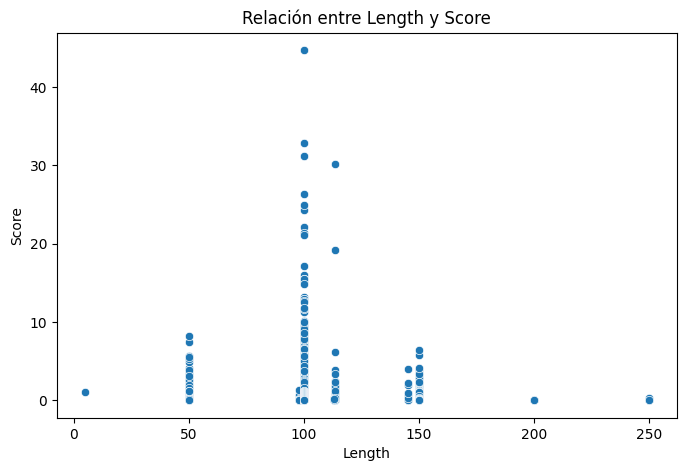

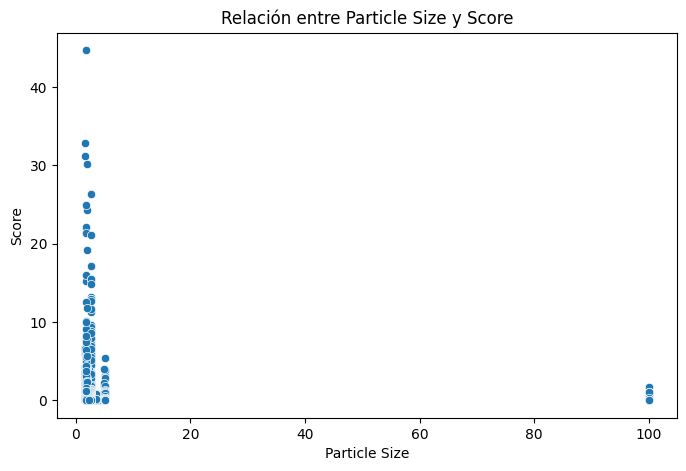

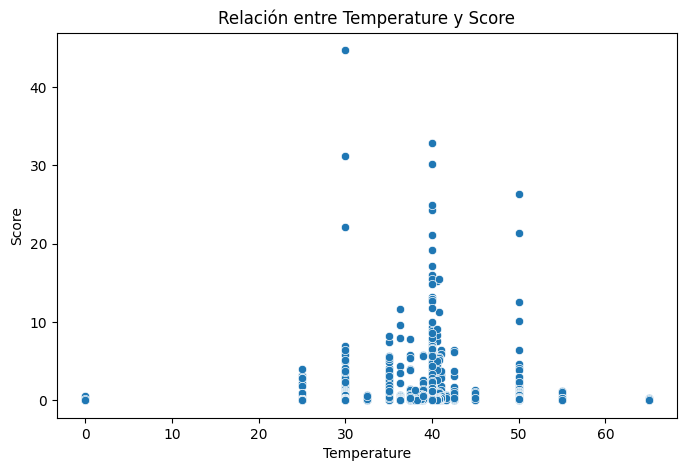

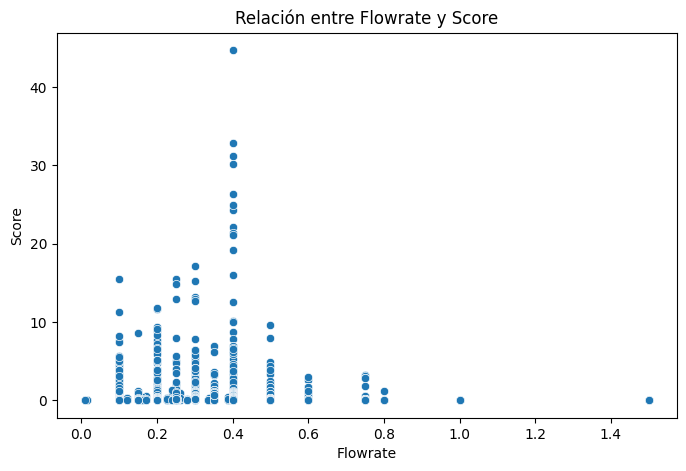

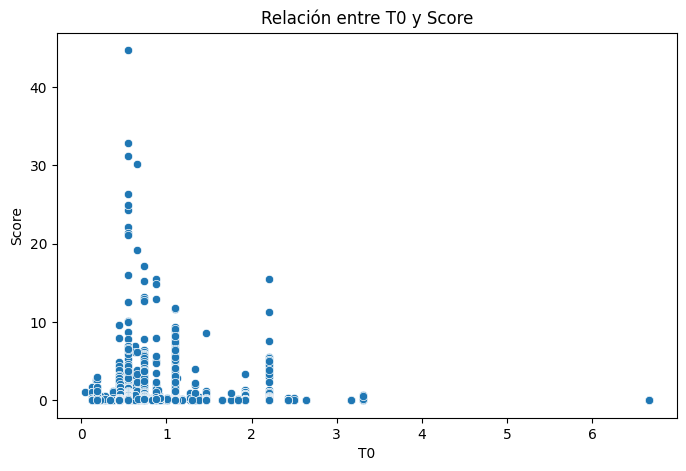

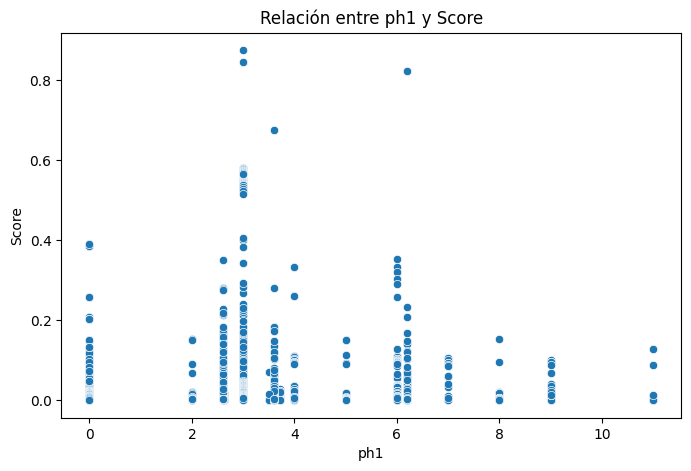

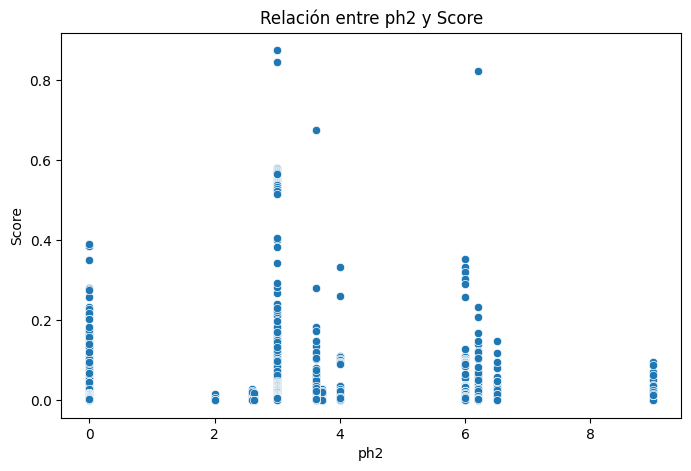

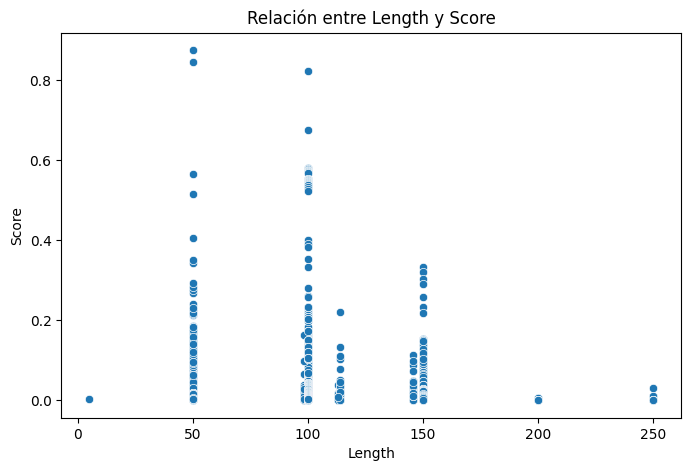

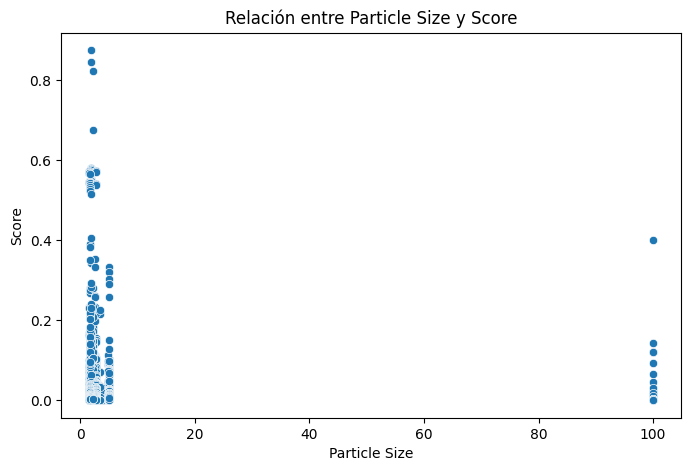

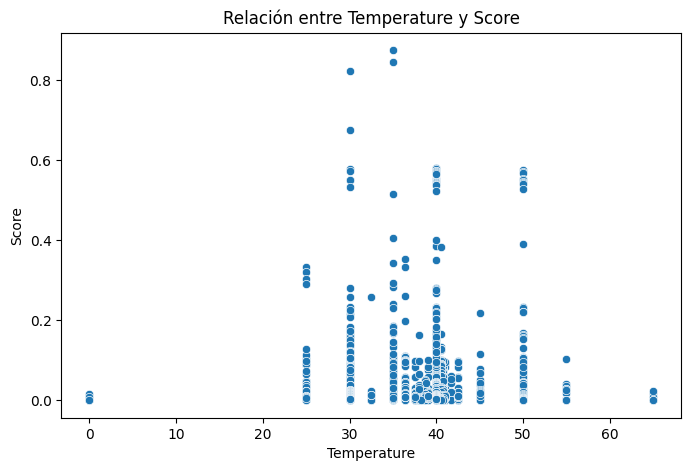

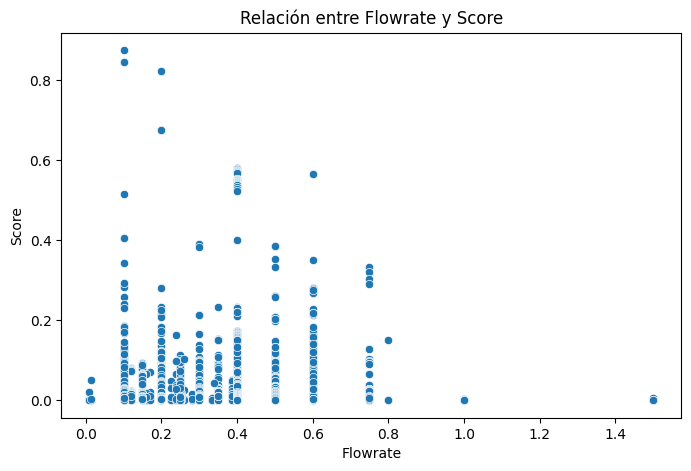

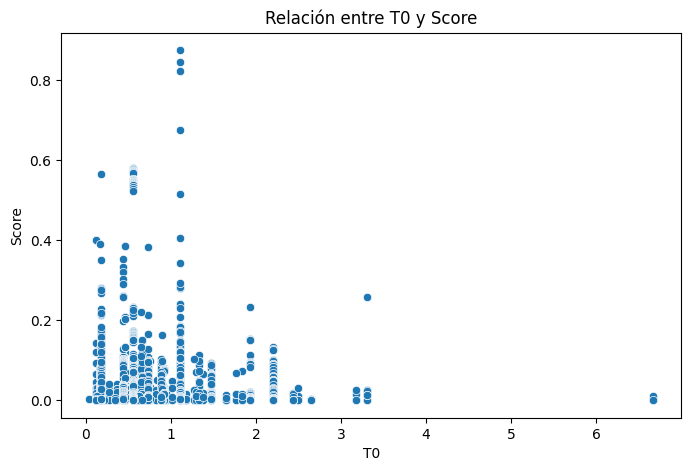

In [19]:
# Relación entre Score y otras variables numéricas
numeric_cols = ["ph1", "ph2", "Length", "Particle Size", "Temperature", "Flowrate", "T0"]
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_alpha[col], y=df_alpha["Score"])
    plt.title(f"Relación entre {col} y Score")
    plt.show()

# Relación entre Score y otras variables numéricas
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_diff[col], y=df_diff["Score"])
    plt.title(f"Relación entre {col} y Score")
    plt.show()

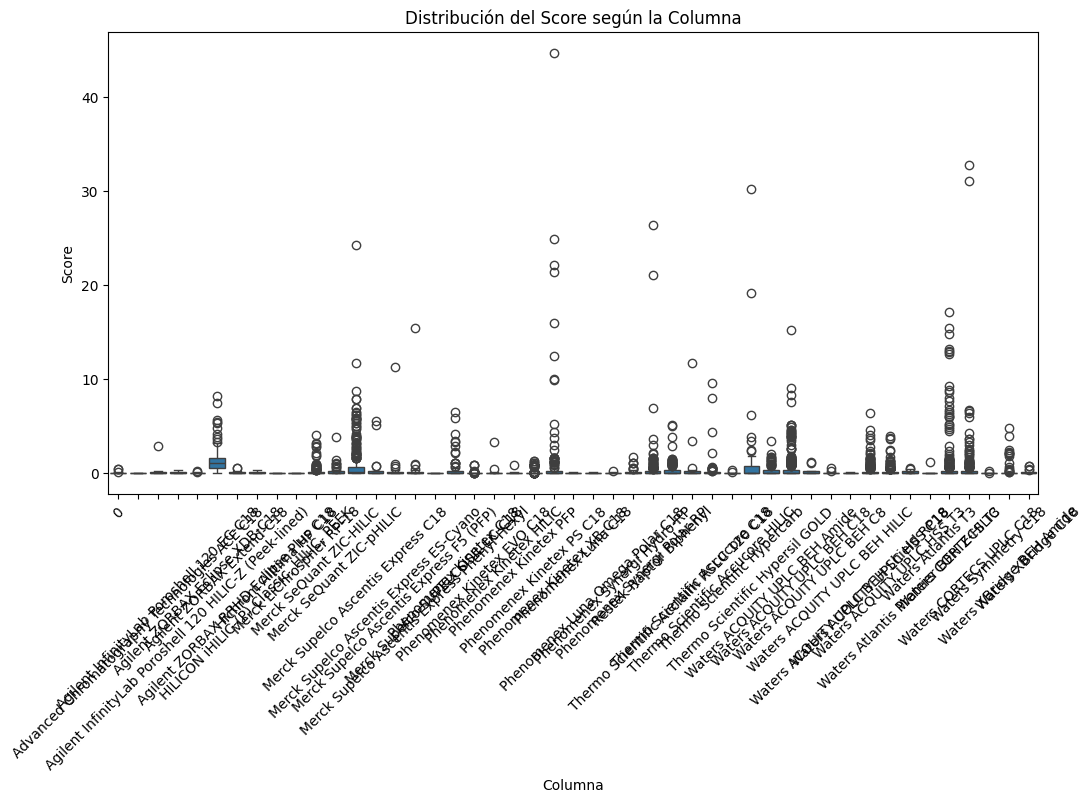

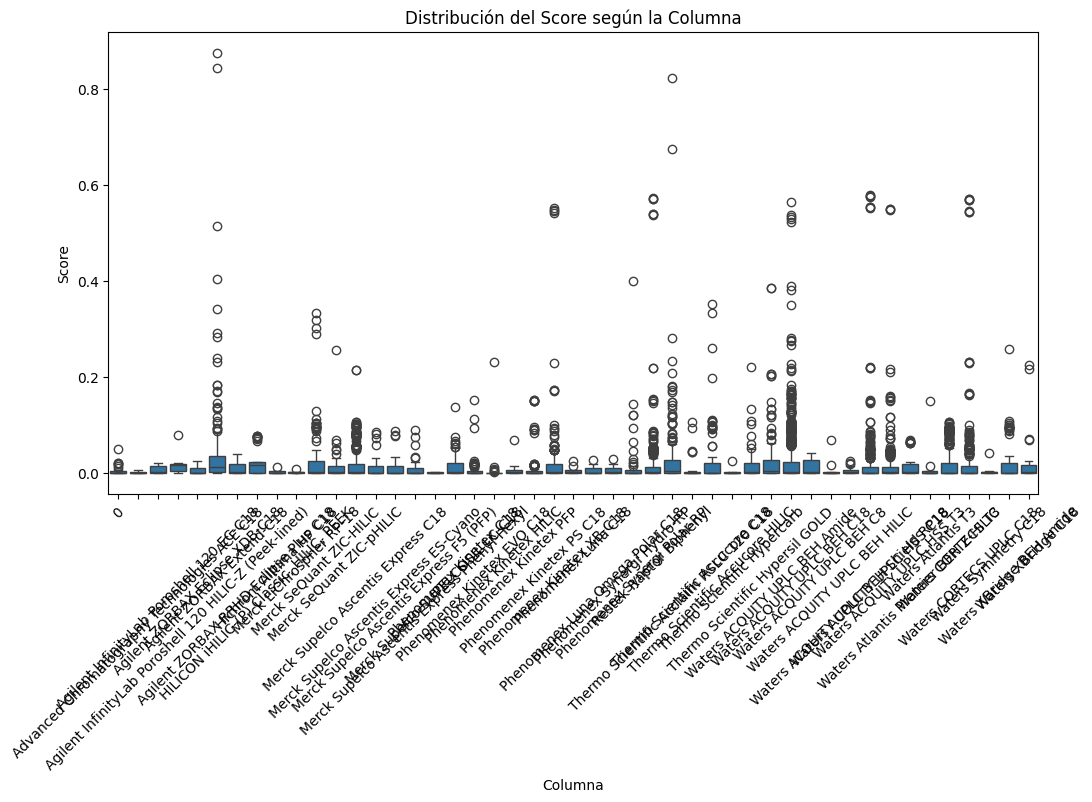

In [20]:
# Boxplot del Score según la columna utilizada
plt.figure(figsize=(12, 6))
sns.boxplot(x="Columna", y="Score", data=df_alpha)
plt.xticks(rotation=45)
plt.title("Distribución del Score según la Columna")
plt.show()

# Boxplot del Score según la columna utilizada
plt.figure(figsize=(12, 6))
sns.boxplot(x="Columna", y="Score", data=df_diff)
plt.xticks(rotation=45)
plt.title("Distribución del Score según la Columna")
plt.show()

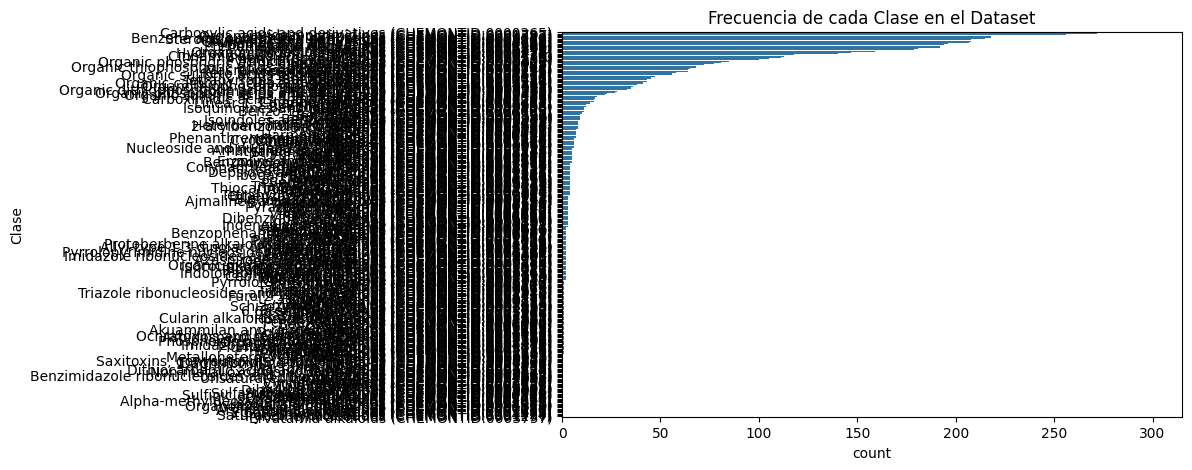

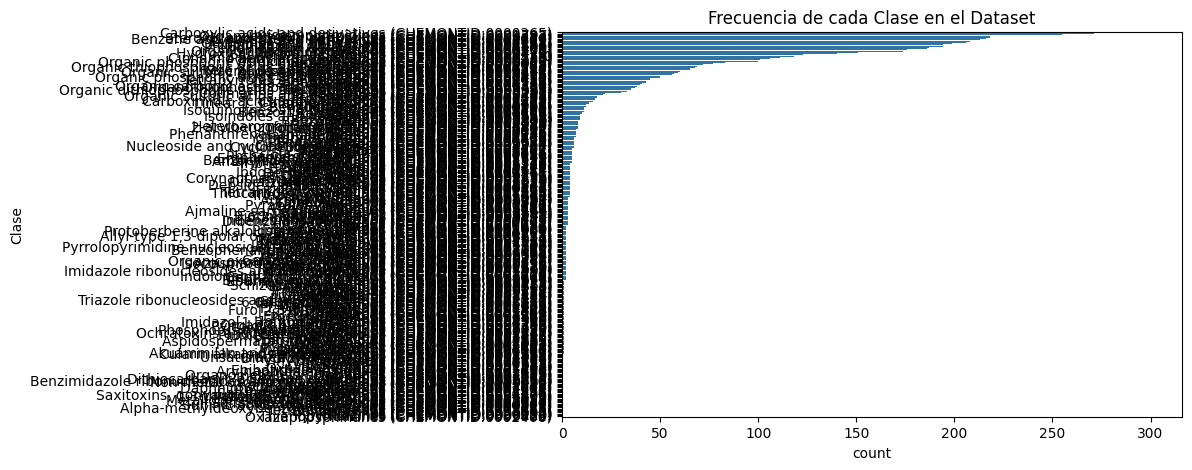

In [21]:


# Conteo de clases en el dataset
plt.figure(figsize=(8, 5))
sns.countplot(y=df_alpha["Clase"], order=df_alpha["Clase"].value_counts().index)
plt.title("Frecuencia de cada Clase en el Dataset")
plt.show()

# Conteo de clases en el dataset
plt.figure(figsize=(8, 5))
sns.countplot(y=df_diff["Clase"], order=df_diff["Clase"].value_counts().index)
plt.title("Frecuencia de cada Clase en el Dataset")
plt.show()


C:\Users\cmora\AppData\Local\Temp\ipykernel_12468\2369445448.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_top3 = df_alpha.groupby("Clase").apply(lambda x: x.nlargest(3, "Score")).reset_index(drop=True)
C:\Users\cmora\AppData\Local\Temp\ipykernel_12468\2369445448.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top3 = df_alpha.groupby("Clase").apply(lambda x: x.nlargest(3, "Score")).reset_index(drop=True)


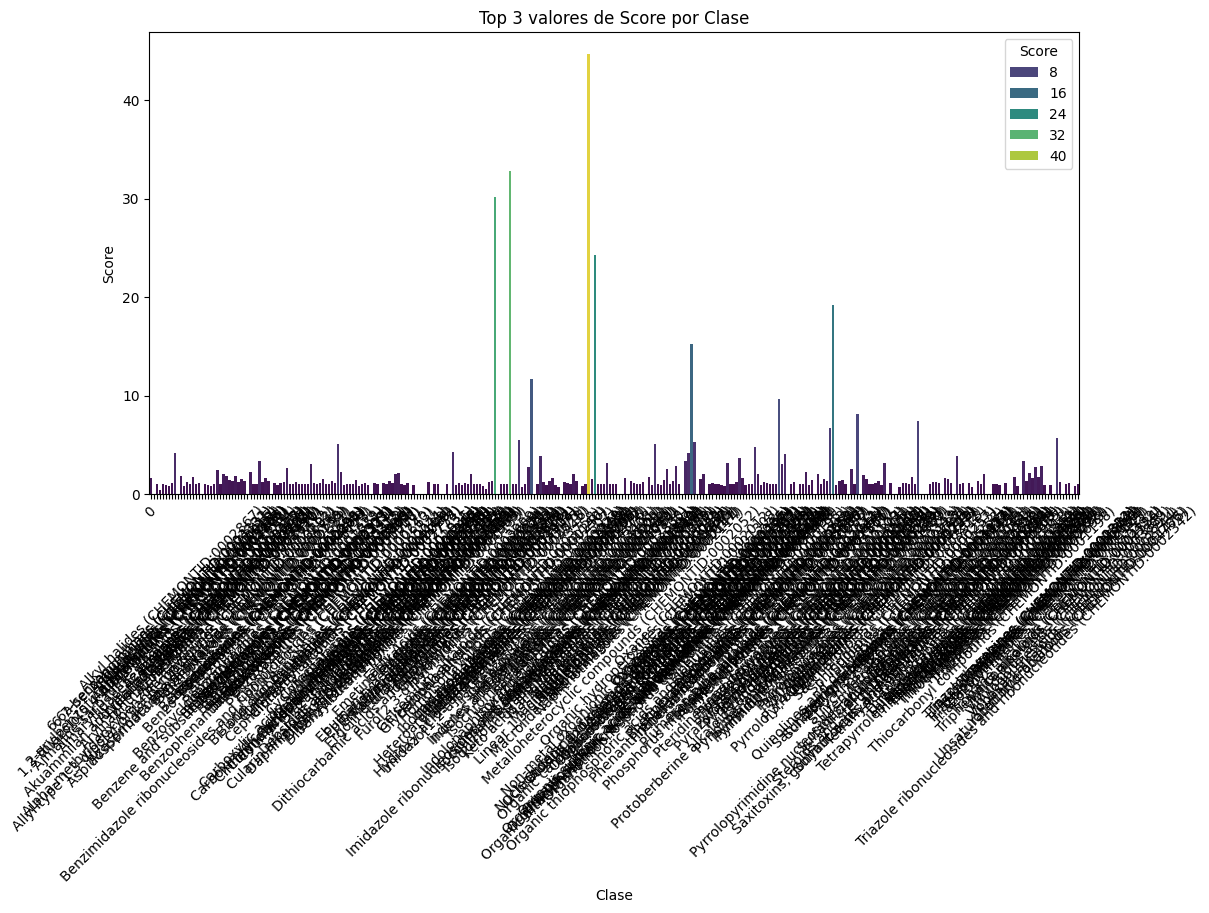

C:\Users\cmora\AppData\Local\Temp\ipykernel_12468\2369445448.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_top3 = df_diff.groupby("Clase").apply(lambda x: x.nlargest(3, "Score")).reset_index(drop=True)
C:\Users\cmora\AppData\Local\Temp\ipykernel_12468\2369445448.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top3 = df_diff.groupby("Clase").apply(lambda x: x.nlargest(3, "Score")).reset_index(drop=True)


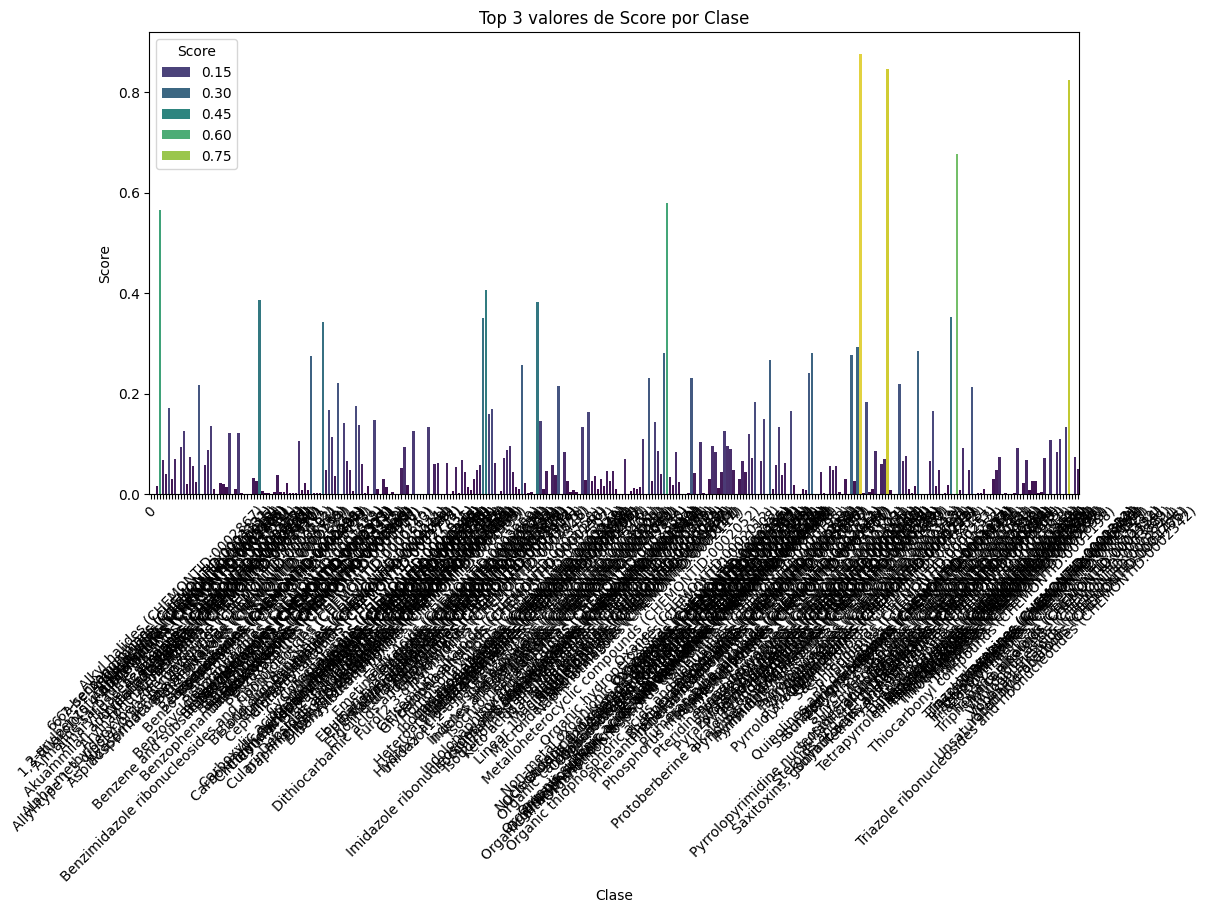

In [22]:
# Gráfico de los 3 valores más altos de Score para cada Clase
df_top3 = df_alpha.groupby("Clase").apply(lambda x: x.nlargest(3, "Score")).reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(x="Clase", y="Score", data=df_top3, hue="Score", dodge=False, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 3 valores de Score por Clase")
plt.show()

# Gráfico de los 3 valores más altos de Score para cada Clase
df_top3 = df_diff.groupby("Clase").apply(lambda x: x.nlargest(3, "Score")).reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(x="Clase", y="Score", data=df_top3, hue="Score", dodge=False, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 3 valores de Score por Clase")
plt.show()

Que valores son extremos

In [25]:
print(df_alpha[df_alpha['Score'] > 40])

                                               Clase       Eluyente1  \
3908  Keto acids and derivatives (CHEMONTID:0000389)  eluent.1.h2o 0   

           Eluyente2  ph1  ph2  gradiente                    Columna  \
3908  eluent.2.acn 0  3.0  3.0          0  Phenomenex Kinetex XB-C18   

                USP Code  Length  Particle Size  Temperature  Flowrate  \
3908  column.usp.code_L1   100.0            1.7         30.0       0.4   

           T0      Score  
3908  0.55125  44.681769  


In [23]:
print(len(df_alpha[df_alpha['Score'] > 20]['Clase']))
print(df_alpha[df_alpha['Score'] > 20]['Score'])

10
912     24.294249
3572    32.787840
3573    31.121331
3574    26.365879
3575    24.946654
3576    22.139753
3577    21.395017
3578    21.113985
3908    44.681769
7703    30.184200
Name: Score, dtype: float64


In [24]:
print(len(df_diff[df_diff['Score'] > 0.5]['Clase']))
print(df_diff[df_diff['Score'] > 0.5]['Score'])

37
108     0.579991
109     0.577873
110     0.577208
111     0.576330
112     0.573539
113     0.572236
114     0.572115
115     0.571781
116     0.571331
117     0.569106
118     0.568922
119     0.554386
120     0.553955
121     0.551738
122     0.551664
123     0.550106
124     0.549539
125     0.548618
126     0.548014
127     0.546671
128     0.546259
129     0.544674
130     0.543210
131     0.542255
132     0.540608
133     0.540151
134     0.538742
135     0.537562
136     0.533940
137     0.529133
138     0.522732
1065    0.875140
4691    0.675918
4692    0.516062
8937    0.823669
9401    0.564964
9544    0.845230
Name: Score, dtype: float64
